<a href="https://colab.research.google.com/github/KholidMaulidi/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**MODUL 6 – Histogram, Histogram Equalization, Dithering**

##Nama : Kholid Maulidi
##Kelas : 3C
##No Absen : 13
##NIM : 2141720139

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
import math
import os
import glob

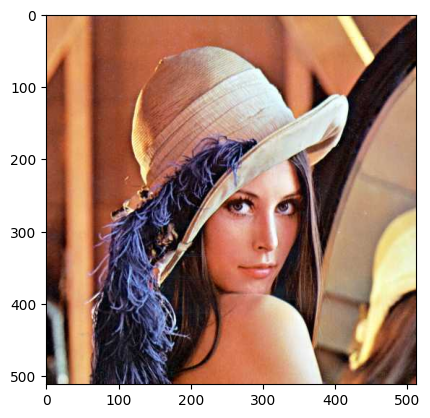

In [18]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)


#NOMOR 3

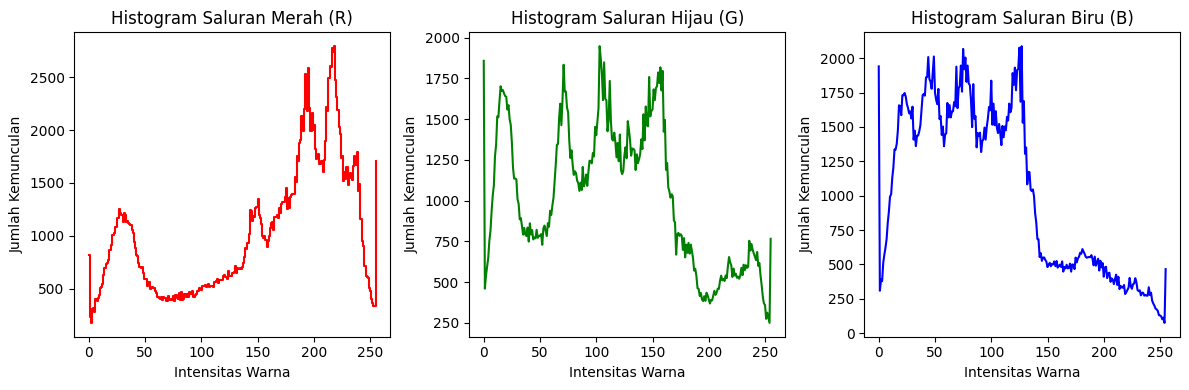

In [25]:
# Pastikan citra tidak kosong
if img is None:
    print('Error: File citra tidak ditemukan.')
else:
    # Langkah 2: Menghitung histogram R, G, B
    histogram_r = cv.calcHist([img], [0], None, [256], [0, 256])  # Saluran merah (R)
    histogram_g = cv.calcHist([img], [1], None, [256], [0, 256])  # Saluran hijau (G)
    histogram_b = cv.calcHist([img], [2], None, [256], [0, 256])  # Saluran biru (B)

    # Langkah 3: Membuat histogram untuk R, G, B
    intensitas_warna = np.arange(256)
    plt.figure(figsize=(12, 4))

    # Tampilkan histogram R
    plt.subplot(1, 3, 1)
    plt.plot(histogram_r, color='red')
    plt.title('Histogram Saluran Merah (R)')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

    # Tampilkan histogram G
    plt.subplot(1, 3, 2)
    plt.plot(histogram_g, color='green')
    plt.title('Histogram Saluran Hijau (G)')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

    # Tampilkan histogram B
    plt.subplot(1, 3, 3)
    plt.plot(histogram_b, color='blue')
    plt.title('Histogram Saluran Biru (B)')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

    plt.tight_layout()
    plt.show()

#NOMOR 4

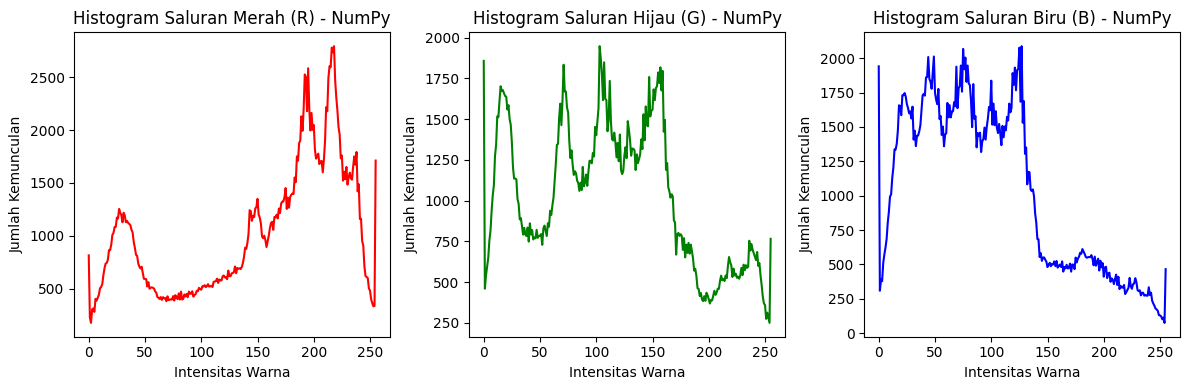

In [31]:
# Pastikan citra tidak kosong
if img is None:
    print('Error: File citra tidak ditemukan.')
else:
    # Menghitung histogram menggunakan NumPy
    histogram_r, batas_r = np.histogram(img[:, :, 0], bins=256, range=[0, 256])  # Saluran merah (R)
    histogram_g, batas_g = np.histogram(img[:, :, 1], bins=256, range=[0, 256])  # Saluran hijau (G)
    histogram_b, batas_b = np.histogram(img[:, :, 2], bins=256, range=[0, 256])  # Saluran biru (B)

    # Langkah 3: Membuat histogram untuk R, G, B dalam bentuk 3 grafik horizontal
    intensitas_warna = np.arange(256)
    plt.figure(figsize=(12, 4))

    # Tampilkan histogram R menggunakan NumPy
    plt.subplot(1, 3, 1)
    plt.plot(histogram_r, color='red')
    plt.title('Histogram Saluran Merah (R) - NumPy')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

    # Tampilkan histogram G menggunakan NumPy
    plt.subplot(1, 3, 2)
    plt.plot(histogram_g, color='green')
    plt.title('Histogram Saluran Hijau (G) - NumPy')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

    # Tampilkan histogram B menggunakan NumPy
    plt.subplot(1, 3, 3)
    plt.plot(histogram_b, color='blue')
    plt.title('Histogram Saluran Biru (B) - NumPy')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

    plt.tight_layout()
    plt.show()

Outputnya samaa


#NOMOR 5

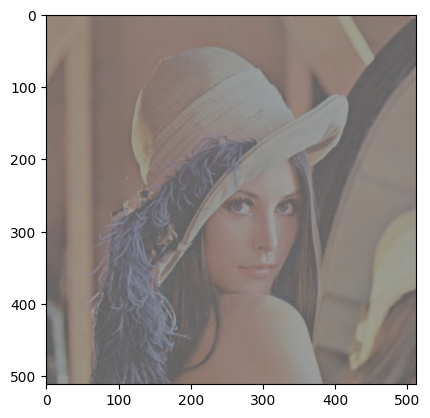

In [32]:
img = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [37]:
img1 = cv.imread('/content/drive/MyDrive/Image/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2],color='gray')

ValueError: ignored